<a href="https://colab.research.google.com/github/Tdas-christ/Machine_Learning/blob/main/2348569_AML_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/Program_1_dataset.csv')

In [3]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [8]:
df= df.drop(columns=['Zone_proportion', 'CHAS'], axis=1)

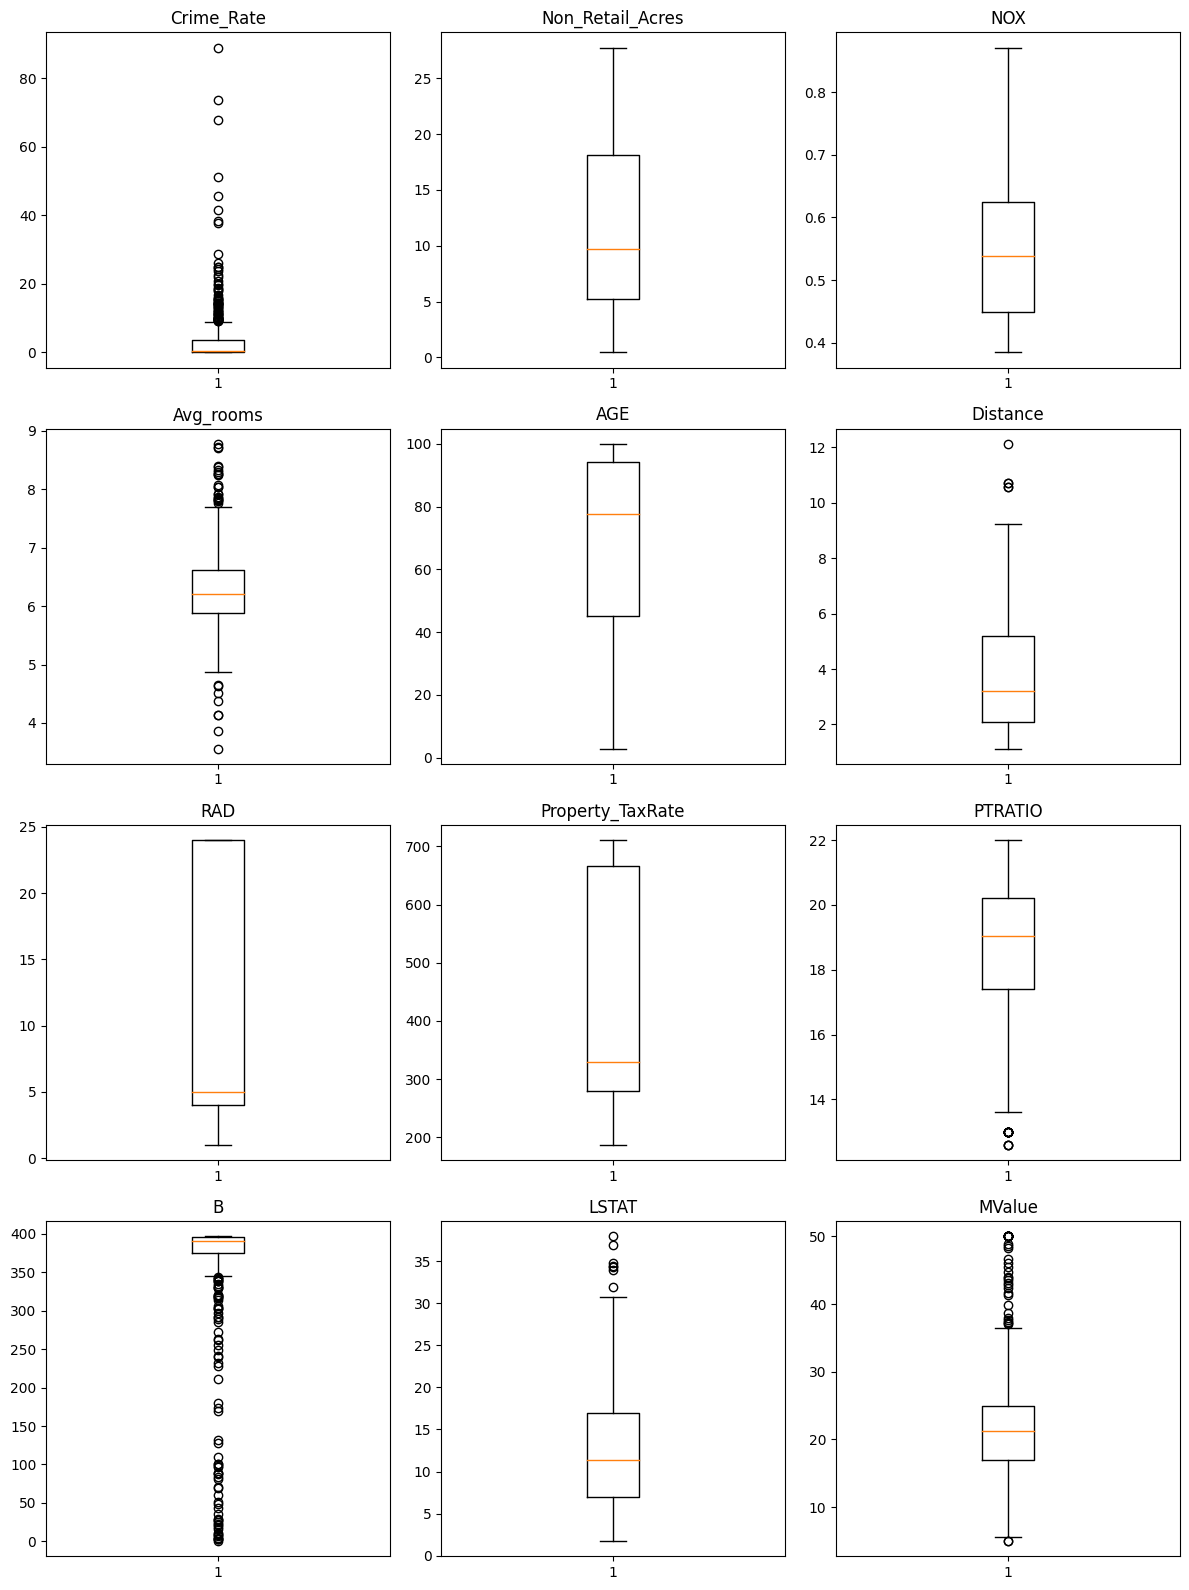

In [9]:
num_attributes = len(df.columns)
num_cols = 3  # You can adjust this value based on your preferences
num_rows = -(-num_attributes // num_cols)  # Ceiling division to ensure enough rows

# Calculate figsize based on the number of rows and columns
fig_width = 4 * num_cols
fig_height = 4 * num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot boxplots for each attribute
for i, col in enumerate(df.columns):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
outliers = np.where(df['Distance']>10)[0]
outliers

array([252, 253, 254, 255, 256])

In [11]:
df.drop(index=outliers, inplace=True)

In [12]:
outliers1 = np.where(df['LSTAT']>30)[0]
outliers1

array([ 42, 269, 270, 280, 281, 283, 284, 351, 400, 464, 466, 490])

In [13]:
df.drop(index=outliers1, inplace=True)

In [14]:
outliers2 = np.where(df['PTRATIO']<13)[0]
outliers2

array([96, 97, 98])

In [15]:
df.drop(index=outliers2, inplace=True)

In [16]:
mean_val=df['MValue'].mean()
mean_val

22.430041152263374

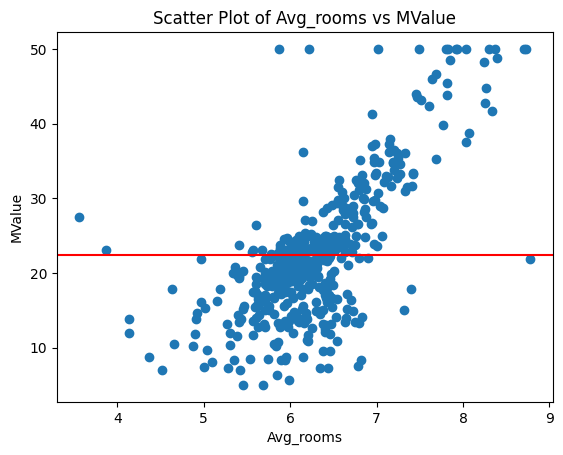

In [17]:
plt.scatter(df['Avg_rooms'], df['MValue'])
plt.axhline(y=mean_val,color='red')
#annotate x and y labels
plt.annotate("Avg. MValue", xy=(1,mean_val+2.5))
plt.title('Scatter Plot of Avg_rooms vs MValue')
plt.xlabel('Avg_rooms')
plt.ylabel('MValue')
plt.show()

**Building a Simple Linear Regression Model**

In [62]:
from sklearn.model_selection import train_test_split
X = df['Avg_rooms']
Y = df['MValue']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [63]:
df1=pd.concat([X_train,Y_train],axis=1)
df1.head()

,Avg_rooms,MValue
3,6.405,18.6
208,6.849,28.2
176,6.854,32.0
61,6.250,27.0
114,6.375,28.1


In [64]:
min_model1=Y_train.mean()
min_model2=10+12*X_train #y=c+mx
min_model3=6+18*X_train

In [65]:
min_model1

22.39588235294118

In [66]:
min_model2

3      86.860
208    92.188
176    92.248
61     85.000
114    86.500
        ...  
110    74.128
285    62.416
364    84.064
452    89.500
106    80.692
Name: Avg_rooms, Length: 340, dtype: float64

In [67]:
min_model3

3      121.290
208    129.282
176    129.372
61     118.500
114    120.750
        ...   
110    102.192
285     84.624
364    117.096
452    125.250
106    112.038
Name: Avg_rooms, Length: 340, dtype: float64

In [68]:
df1['Min_model1']=min_model1
df1['Min_model2']=min_model2
df1['Min_model3']=min_model3

Text(0.5, 1.0, 'Model Comparison')

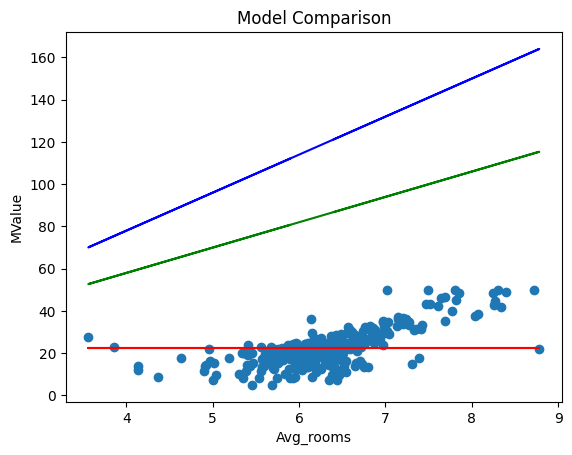

In [69]:
fig, ax=plt.subplots()
ax.scatter(x='Avg_rooms',y='MValue',data=df1, label='Actual MValue')

ax.plot(df1['Avg_rooms'],df1['Min_model1'],color='red', label='Model_1')
ax.plot(df1['Avg_rooms'],df1['Min_model2'],color='green', label='Model_2')
ax.plot(df1['Avg_rooms'],df1['Min_model3'],color='blue', label='Model_3')

ax.set_xlabel('Avg_rooms')
ax.set_ylabel('MValue')
ax.set_title('Model Comparison')


**Creating Best Fit Model**


In [70]:
x=X_train
y=Y_train

xy=x*y
n=len(df1)

xmean=X_train.mean()
ymean=Y_train.mean()

numerator=xy.sum() - n*xmean*ymean
denom=(x**2).sum() - n*(xmean**2)

m=numerator/denom
c=ymean - (m*xmean)
print('intercept-c:', c, 'Coefficient-m:',m)


intercept-c: -31.191945210116273 Coefficient-m: 8.545299988949902


In [79]:
#Estimating MValue using intercept and coefficient of best fit model
best_fit_model = c +m*df.Avg_rooms

df1['Best_Fit_Model']=best_fit_model
df1.head()

,Avg_rooms,MValue,Min_model1,Min_model2,Min_model3,Best_Fit_Model
3,6.405,18.6,22.395882,86.860,121.290,23.540701
208,6.849,28.2,22.395882,92.188,129.282,27.334814
176,6.854,32.0,22.395882,92.248,129.372,27.377541
61,6.250,27.0,22.395882,85.000,118.500,22.216180
114,6.375,28.1,22.395882,86.500,120.750,23.284342


**Using scikit-learn**

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df[['Avg_rooms']]
Y=df[['MValue']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression()

In [74]:
print('Intercept:',linreg.intercept_)
print('Coefficients:',linreg.coef_)

Intercept: [-31.19194521]
Coefficients: [[8.54529999]]


In [94]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [95]:
print("Mean Squared Error (Train):", mean_squared_error(Y_train, y_pred_train))
print("\nR-squared (Train):", r2_score(Y_train, y_pred_train))

Mean Squared Error (Train): 36.678311192353235

R-squared (Train): 0.5059008137472072


In [96]:
print("Mean Squared Error (Test):", mean_squared_error(Y_test, y_pred_test))
print("R-squared (Test):", r2_score(Y_test, y_pred_test))

Mean Squared Error (Test): 45.46041504878786
R-squared (Test): 0.5329560565142542


**Analyzing Best Fit Model**

In [81]:
#Validating Best Fit Model
bestfitmodel_obs = pd.DataFrame({'Avg_rooms': df1['Avg_rooms'],
                          'MValue':df1['MValue'],
                          'Predicted MValue': df1['Best_Fit_Model'],
                          'Error': (df1.Best_Fit_Model- df1.MValue)})

bestfitmodel_obs

,Avg_rooms,MValue,Predicted MValue,Error
3,6.405,18.6,23.540701,4.940701
208,6.849,28.2,27.334814,-0.865186
176,6.854,32.0,27.377541,-4.622459
61,6.250,27.0,22.216180,-4.783820
114,6.375,28.1,23.284342,-4.815658
...,...,...,...,...
110,5.344,20.0,14.474138,-5.525862
285,4.368,8.8,6.133925,-2.666075
364,6.172,27.1,21.549646,-5.550354
452,6.625,28.4,25.420667,-2.979333


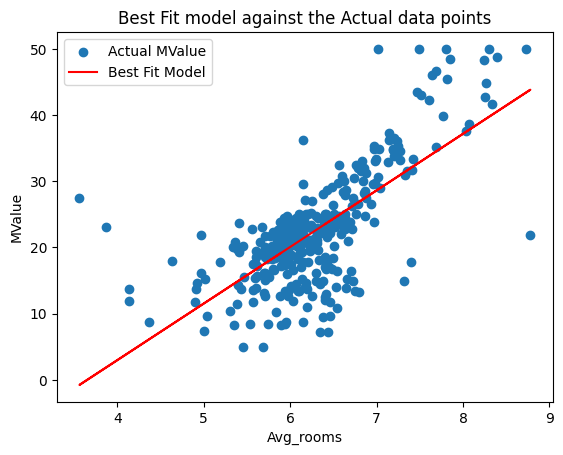

In [97]:
fig,ax=plt.subplots()

#plotting actual MValue
plt.scatter(x='Avg_rooms', y='MValue', data=df1, label='Actual MValue')

#Plotting the Best Fit model
ax.plot(df1['Avg_rooms'], df1['Best_Fit_Model'], color='red', label='Best Fit Model')

#Adding xlabel, ylabel, title, legend
ax.set_ylabel('MValue')
ax.set_xlabel('Avg_rooms')
ax.set_title('Best Fit model against the Actual data points')
ax.legend()

In [82]:
SST=sum((df.MValue-df.MValue.mean())**2) #Sum of squared treatments
SST

39451.561399177

In [84]:
SSE=sum(bestfitmodel_obs.Error**2) #sum of squared errors
SSE

12470.625805400101

In [88]:
SSR=SST-SSE
SSR

26980.9355937769

In [89]:
Rsq=(SSR/SST)
Rsq

0.6839003232541196